# Hitran Tutorial
======================

- author : Sylvie Dagoret-Campagne
- date :Jeudi 27 avril 2017



In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib as mpl

/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Get HAPI
---------------


Interface to access to Hitran database

In [2]:
from hapi import *

HAPI version: 1.1.0.6
To get the most up-to-date version please check http://hitran.org/hapi


# Connect to the Hitran database
-------------------------------------------


In [3]:
db_begin('data')

Using data

CO2
                     Lines parsed: 3831
H2O
                     Lines parsed: 64023
NO2
                     Lines parsed: 5873
O2
                     Lines parsed: 1019
O3
                     Lines parsed: 309107


## Fetch CO2

In [4]:
fetch('CO2',2,1,2000,2100)

BEGIN DOWNLOAD: CO2
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
  65536 bytes written to data/CO2.data
Header written to data/CO2.header
END DOWNLOAD
                     Lines parsed: 3831
PROCESSED


## Fetch H2O lines
---------------------------

- $\nu_{min} = 10000 cm^{-1} \rightarrow \lambda_{max} = 1000 nm$
- $\nu_{max} = 20000 cm^{-1}  \rightarrow \lambda_{min} = 500 nm $

In [5]:
fetch('H2O',1,1,10000,20000)

BEGIN DOWNLOAD: H2O
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  65536 bytes written to data/H2O.data
  655

In [6]:
tableList()

['sampletab', 'CO2', 'H2O', 'O3', 'O2', 'NO2']

In [7]:
describeTable('CO2')

-----------------------------------------
CO2 summary:
-----------------------------------------
Comment: 
Contains lines for (12C)(16O)2
 in 2000.000-2100.000 wavenumber range
Number of rows: 3831
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag

In [8]:
describeTable('H2O')

-----------------------------------------
H2O summary:
-----------------------------------------
Comment: 
Contains lines for H2(16O)
 in 10000.000-20000.000 wavenumber range
Number of rows: 64023
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag 

# Analyse

## Absorption coefficient of CO2

In [9]:
nu,coef=absorptionCoefficient_Lorentz(SourceTables='CO2')

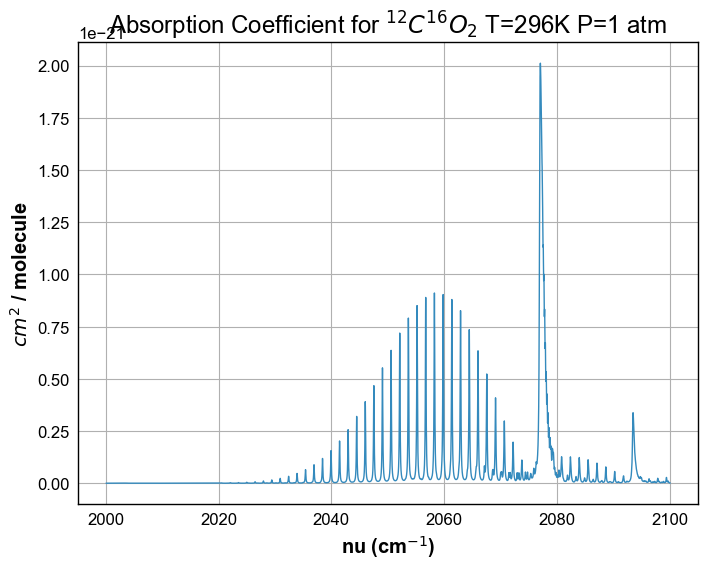

In [10]:
plt.plot(nu,coef)
plt.title('Absorption Coefficient for $^{12}C^{16}O_2$ T=296K P=1 atm')
plt.xlabel('nu (cm$^{-1}$)')
plt.ylabel('$cm^2$ / molecule')

## Absorption coefficient of  H2O

In [11]:
absspec=select('H2O',ParameterNames=('nu','sw'),Conditions=('between','nu',10000,20000))

          nu         S
10000.092994 1.558E-27
10000.319809 6.915E-28
10000.437065 1.548E-27
10000.649100 1.129E-29
10000.666808 2.052E-29
10000.706729 8.313E-28
10000.891443 4.336E-27
10000.926052 1.047E-28
10001.283088 2.472E-29
10001.427458 1.088E-29
10001.591850 1.788E-29
10001.867886 6.060E-27
10001.951809 9.665E-29
10002.091553 1.254E-27
10002.243129 3.462E-27
10002.361972 8.384E-29
10002.486265 7.562E-26
10003.052900 3.019E-28
10003.066257 2.630E-26
10003.339903 2.397E-28
10003.356434 6.941E-28
10003.403300 1.420E-28
10003.447402 2.393E-29
10003.564030 4.794E-28
10003.721300 1.605E-29
10003.899235 4.785E-27
10004.058403 9.480E-29
10004.070083 7.102E-26
10004.104853 2.371E-27
10004.304554 6.388E-25
10004.320209 4.209E-27
10004.329397 8.833E-29
10004.435400 8.533E-29
10004.679224 3.803E-28
10004.918568 1.419E-28
10005.348750 1.033E-27
10005.488958 1.172E-29
10005.706041 7.328E-28
10005.822226 1.142E-29
10006.019124 1.546E-26
10006.095765 4.922E-28
10006.277886 7.099E-27
10006.53707

In [12]:
nu2,sw2 = getColumns('H2O',['nu','sw'])

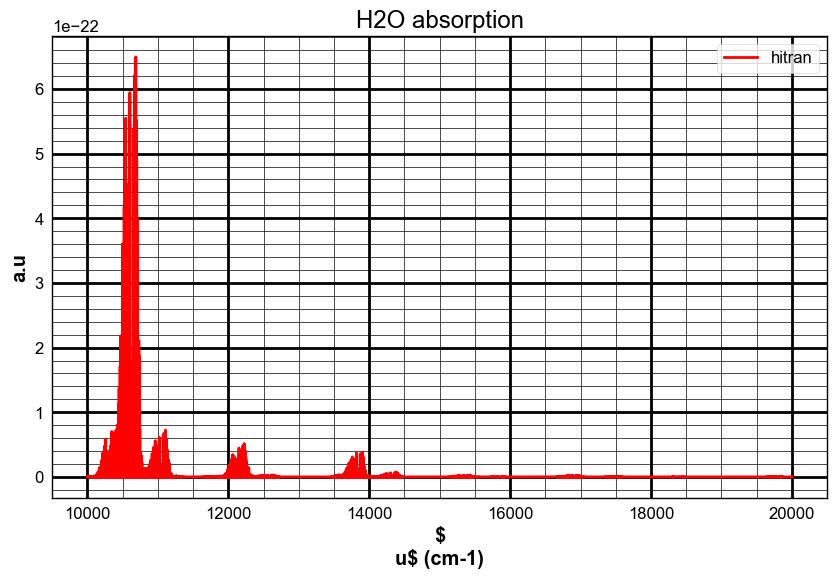

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(nu2,sw2,'r-',lw=2,label='hitran')
ax.set_title("H2O absorption")
ax.set_xlabel("$\nu$ (cm-1)")
ax.set_ylabel("a.u")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.legend(loc='best')

In [14]:
I_h2o=np.array(sw2)

In [15]:
wl_h2o=1e7/np.array(nu2)  # convert cm-1 into nm   (1cm=1e7 nm)

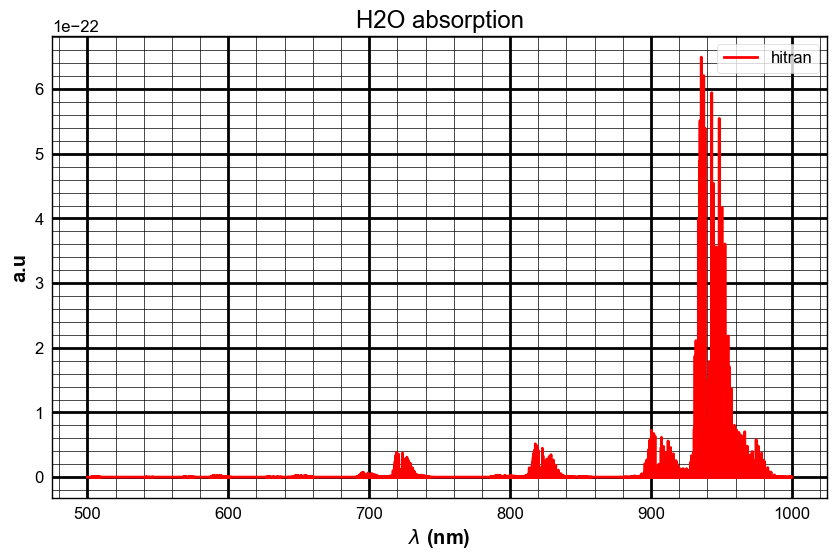

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(wl_h2o,I_h2o,'r-',lw=2,label='hitran')
ax.set_title("H2O absorption")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("a.u")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.legend(loc='best')

In [17]:
nu3,coef = absorptionCoefficient_Lorentz(SourceTables='H2O')

In [18]:
wl3=1e7/np.array(nu3)

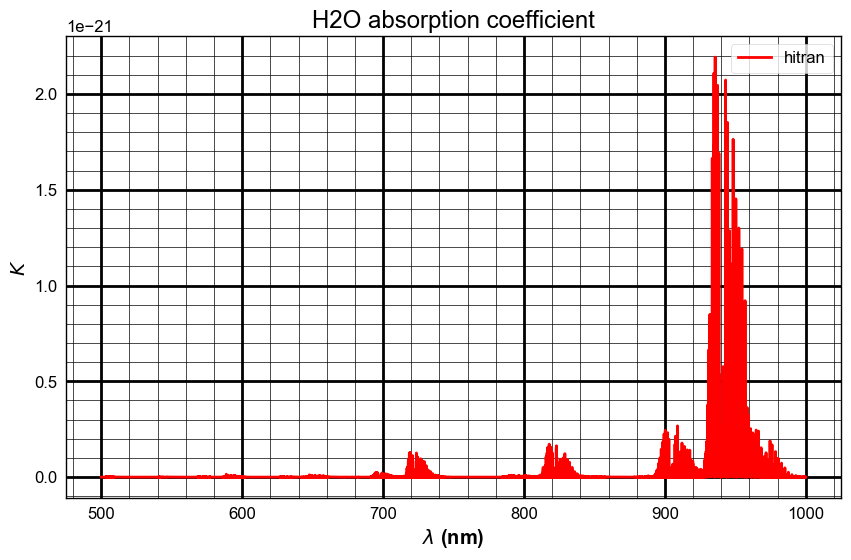

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(wl3,coef,'r-',lw=2,label='hitran')
ax.set_title("H2O absorption coefficient")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("$K$")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
ax.legend(loc='best')

## Fetch O2 lines
---------------------------

- $\nu_{min} = 10000 cm^{-1} \rightarrow \lambda_{max} = 1000 nm$
- $\nu_{max} = 20000 cm^{-1}  \rightarrow \lambda_{min} = 500 nm $

In [20]:
fetch('O2',7,1,10000,20000)

BEGIN DOWNLOAD: O2
  65536 bytes written to data/O2.data
  65536 bytes written to data/O2.data
Header written to data/O2.header
END DOWNLOAD
                     Lines parsed: 418
PROCESSED


In [21]:
nu4,coef4 = absorptionCoefficient_Lorentz(SourceTables='O2')

In [22]:
wl4=1e7/np.array(nu4)

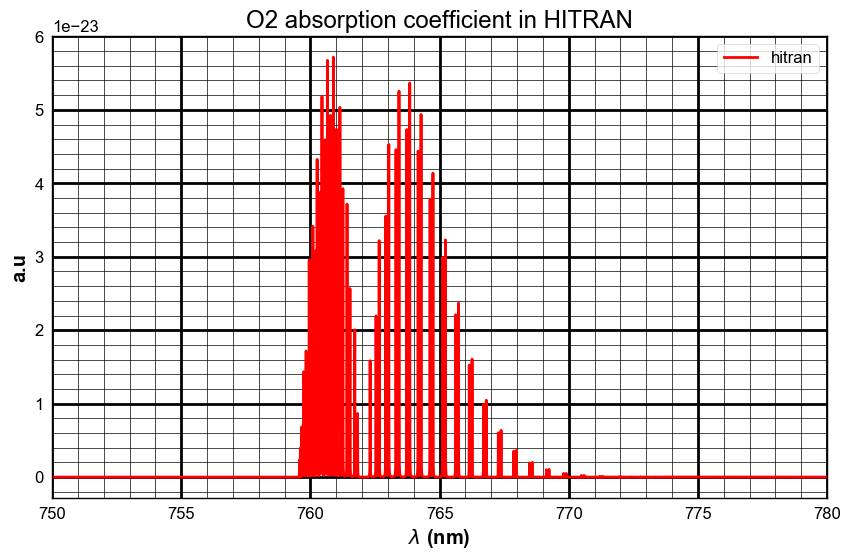

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(wl4,coef4,'r-',lw=2,label='hitran')
ax.set_title("O2 absorption coefficient in HITRAN")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("a.u")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
plt.xlim(750,780)
ax.legend(loc='best')

In [24]:
#plt.plot(wl4,coef4,"r-")
#plt.xlim(750,780)

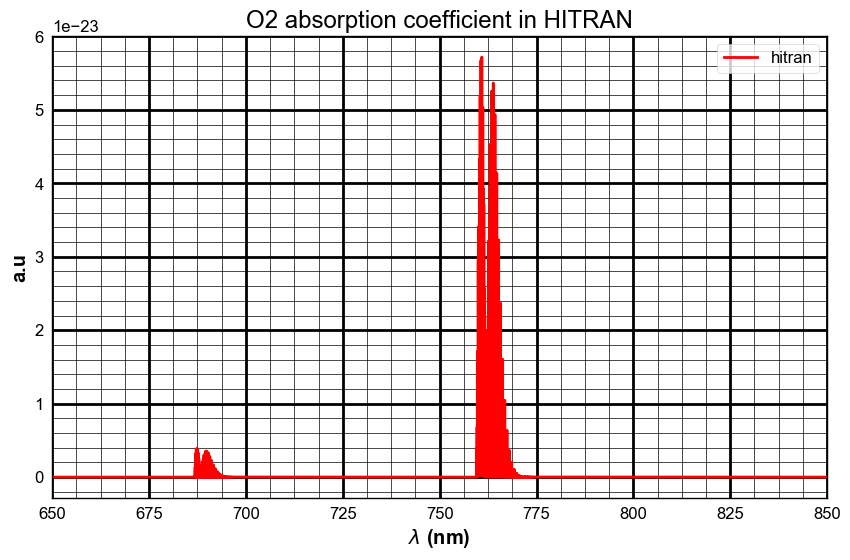

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(wl4,coef4,'r-',lw=2,label='hitran')
ax.set_title("O2 absorption coefficient in HITRAN")
ax.set_xlabel("$\lambda$ (nm)")
ax.set_ylabel("a.u")
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='k', linewidth=0.5)
plt.xlim(650,850)
ax.legend(loc='best')

## O3

###     from 3900 $cm^{-1}$ 4050   $cm^{-1}$

In [26]:
fetch('O3',3,1,3900,4050)

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
Header written to data/O3.header
END DOWNLOAD
                     Lines parsed: 5969
PROCESSED


In [27]:
x,y=getStickXY('O3')

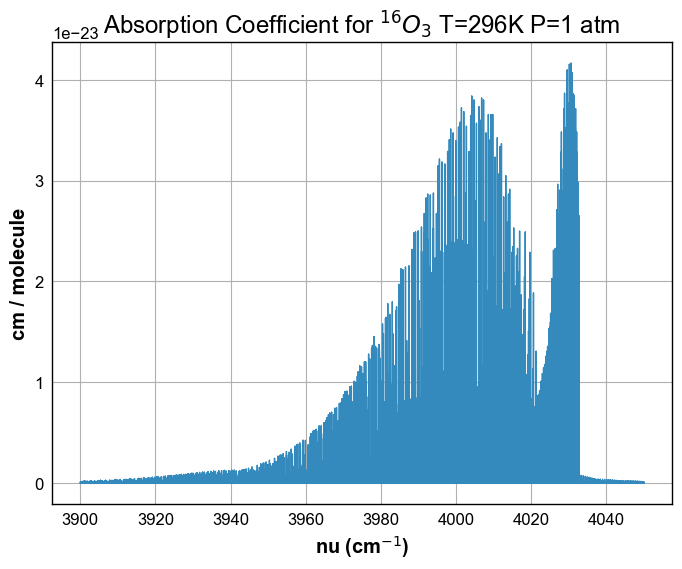

In [28]:
plt.plot(x,y)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('nu (cm$^{-1}$)')
plt.ylabel('cm / molecule')

In [29]:
fetch_by_ids('O3',[16,17,18,19,20],3900,4050)

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
Header written to data/O3.header
END DOWNLOAD
                     Lines parsed: 5969
PROCESSED


In [30]:
x,y=getStickXY('O3')

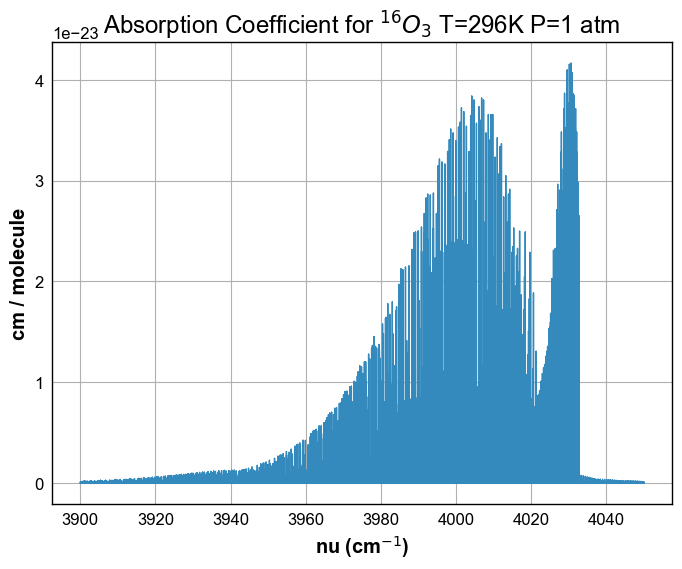

In [31]:
plt.plot(x,y)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('nu (cm$^{-1}$)')
plt.ylabel('cm / molecule')

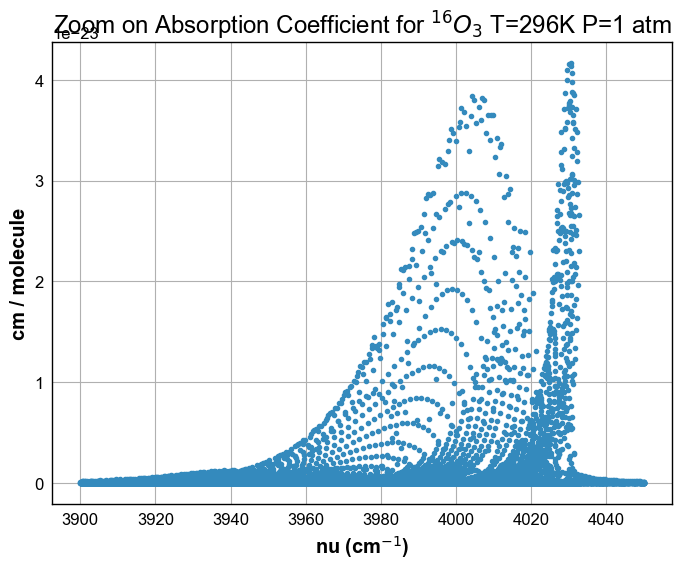

In [32]:
plt.plot(x,y,'.')
plt.title('Zoom on Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('nu (cm$^{-1}$)')
plt.ylabel('cm / molecule')

In [33]:
#getHelp(fetch)

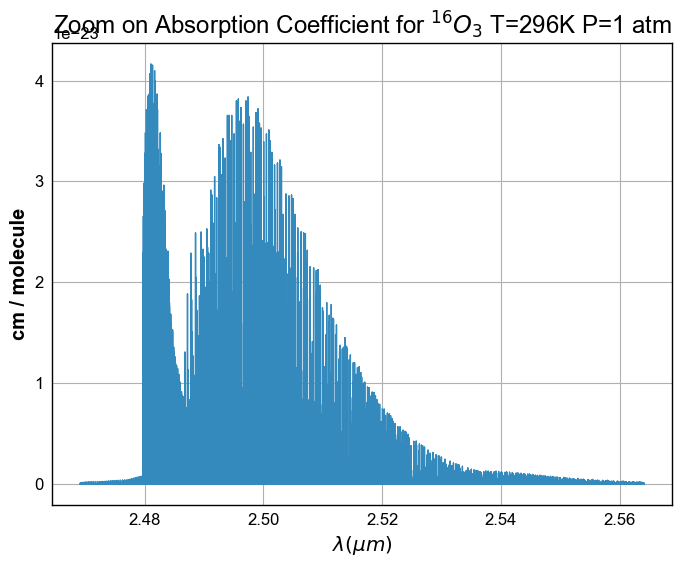

In [34]:
plt.plot(1e4/x,y,)
plt.title('Zoom on Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('$\lambda (\mu m)$')
plt.ylabel('cm / molecule')

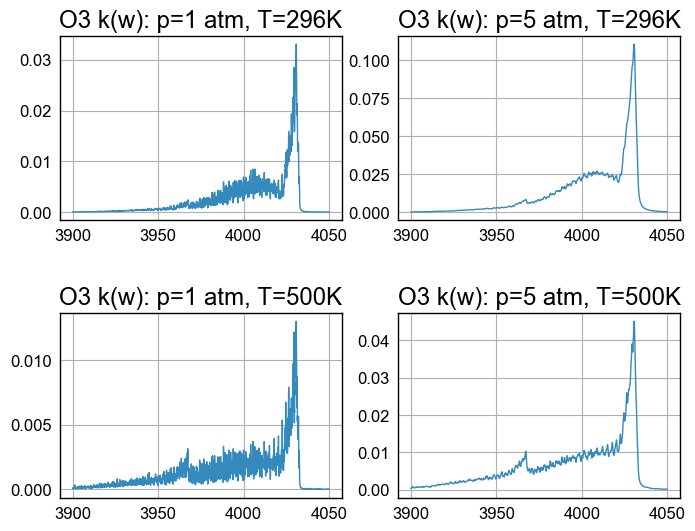

In [35]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
nu1,coef1 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':296.})
nu2,coef2 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':296.})
nu3,coef3 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':500.})
nu4,coef4 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':500.})
plt.subplot(2,2,1); plt.plot(nu1,coef1); plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2); plt.plot(nu2,coef2); plt.title('O3 k(w): p=5 atm, T=296K')
plt.subplot(2,2,3); plt.plot(nu3,coef3); plt.title('O3 k(w): p=1 atm, T=500K')
plt.subplot(2,2,4); plt.plot(nu4,coef4); plt.title('O3 k(w): p=5 atm, T=500K')

###     from 980 $cm^{-1}$ 1100   $cm^{-1}$

In [36]:
print abundance(3, 1)
print abundance(3, 2)
print abundance(3, 3)
print abundance(3, 4)
print abundance(3, 5)


0.992901
0.00398194
0.00199097
0.00074
0.00037


In [37]:
fetch_by_ids('O3',[16,17,18,19,20],980,1100)

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O

In [38]:
x,y=getStickXY('O3')

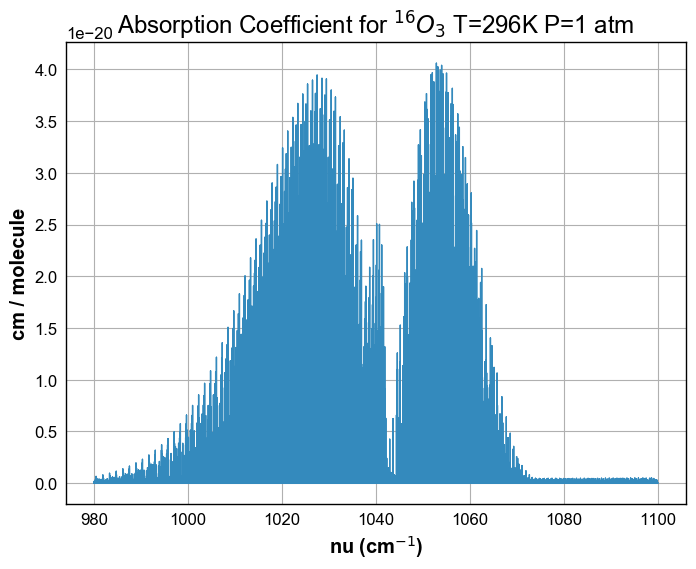

In [39]:
plt.plot(x,y)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('nu (cm$^{-1}$)')
plt.ylabel('cm / molecule')

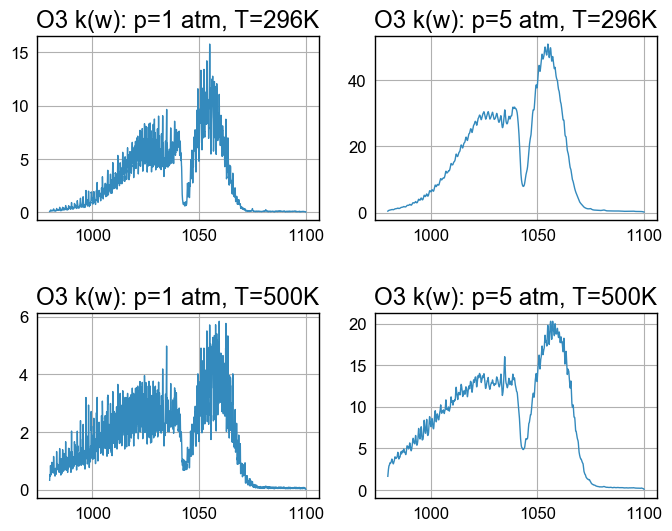

In [40]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
nu1,coef1 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':296.})
nu2,coef2 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':296.})
nu3,coef3 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':500.})
nu4,coef4 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':500.})
plt.subplot(2,2,1); plt.plot(nu1,coef1); plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2); plt.plot(nu2,coef2); plt.title('O3 k(w): p=5 atm, T=296K')
plt.subplot(2,2,3); plt.plot(nu3,coef3); plt.title('O3 k(w): p=1 atm, T=500K')
plt.subplot(2,2,4); plt.plot(nu4,coef4); plt.title('O3 k(w): p=5 atm, T=500K')

In [41]:
nu5,coef5 = absorptionCoefficient_Lorentz(SourceTables='O3')

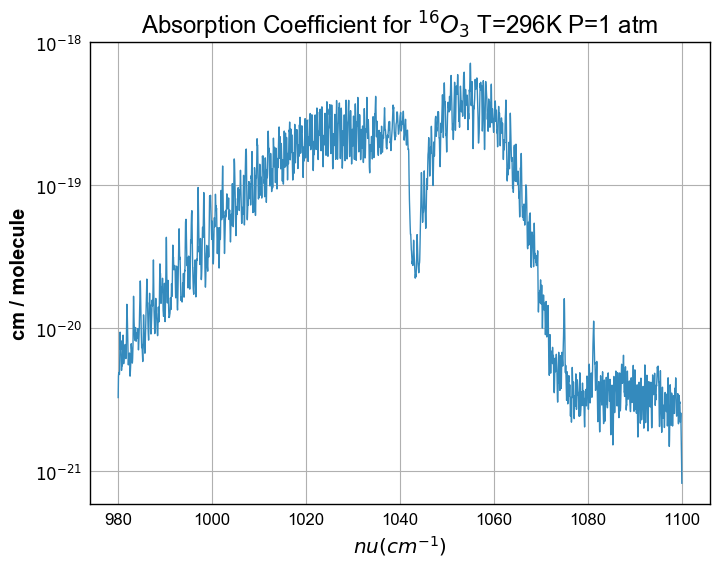

In [42]:
plt.semilogy(nu5,coef5)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('$ nu (cm^{-1}) $')
plt.ylabel('cm / molecule')

In [43]:
wl5=1e4/np.array(nu5)

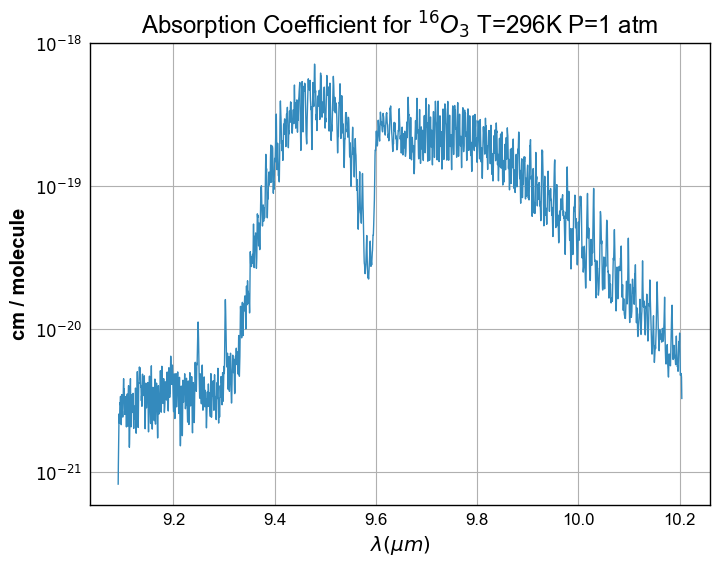

In [44]:
plt.semilogy(wl5,coef5)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('$ \lambda (\mu m)$')
plt.ylabel('cm / molecule')

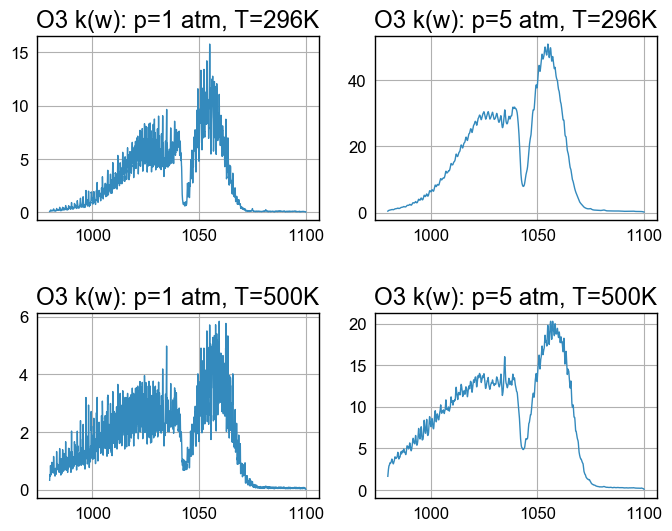

In [45]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
nu1,coef1 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':296.})
nu2,coef2 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':296.})
nu3,coef3 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':500.})
nu4,coef4 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':500.})
plt.subplot(2,2,1); plt.plot(nu1,coef1); plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2); plt.plot(nu2,coef2); plt.title('O3 k(w): p=5 atm, T=296K')
plt.subplot(2,2,3); plt.plot(nu3,coef3); plt.title('O3 k(w): p=1 atm, T=500K')
plt.subplot(2,2,4); plt.plot(nu4,coef4); plt.title('O3 k(w): p=5 atm, T=500K')

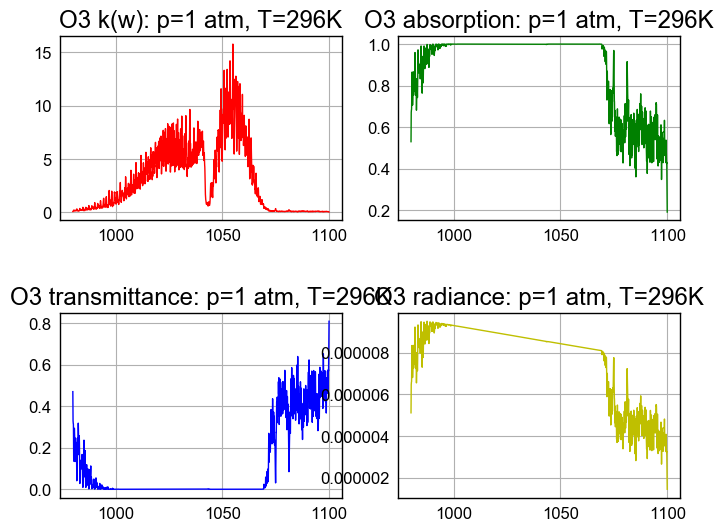

In [65]:
nu,absorp = absorptionSpectrum(nu1,coef1,Environment={'l':10.})
nu,transm = transmittanceSpectrum(nu1,coef1,Environment={'l':10.})
nu,radian = radianceSpectrum(nu1,coef1,Environment={'l':10.,'T':296.})
plt.subplot(2,2,1); plt.plot(nu1,coef1,'r'); plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2); plt.plot(nu,absorp,'g'); plt.title('O3 absorption: p=1 atm, T=296K')
plt.subplot(2,2,3); plt.plot(nu,transm,'b'); plt.title('O3 transmittance: p=1 atm, T=296K')
plt.subplot(2,2,4); plt.plot(nu,radian,'y'); plt.title('O3 radiance: p=1 atm, T=296K')

###     $\nu$ from 900 $cm^{-1}$ 35000   $cm^{-1}$

In [47]:
fetch_by_ids('O3',[16,17,18,19,20],900,35000)

BEGIN DOWNLOAD: O3
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O3.data
  65536 bytes written to data/O

In [48]:
nu55,coef55 = absorptionCoefficient_Lorentz(SourceTables='O3')

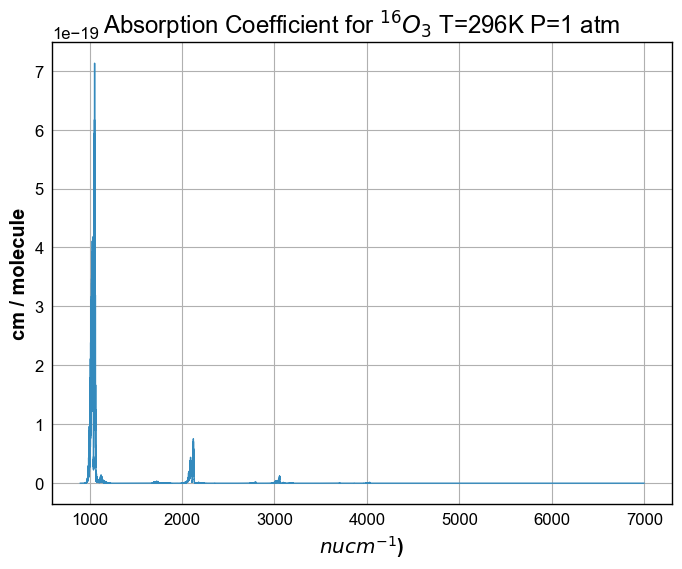

In [49]:
plt.plot(nu55,coef55)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('$nu cm^{-1} $')
plt.ylabel('cm / molecule')

In [50]:
lb55=1e4/nu55

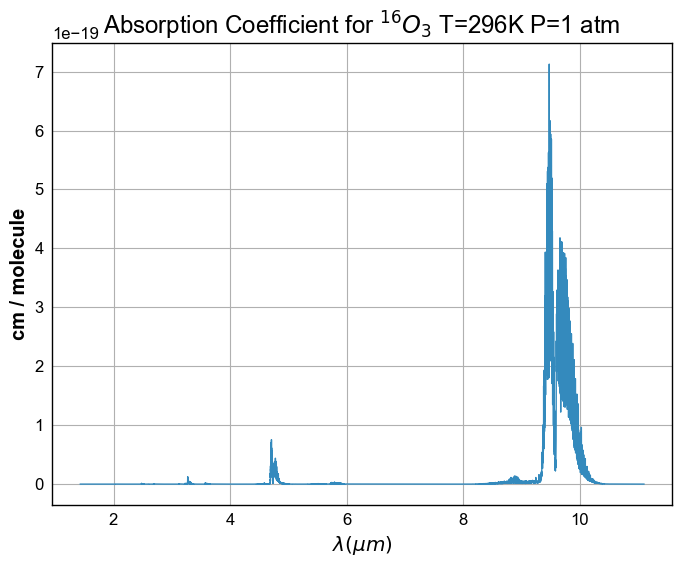

In [51]:
plt.plot(lb55,coef55)
plt.title('Absorption Coefficient for $^{16}O_3$ T=296K P=1 atm')
plt.xlabel('$ \lambda (\mu m  )$')
plt.ylabel('cm / molecule')


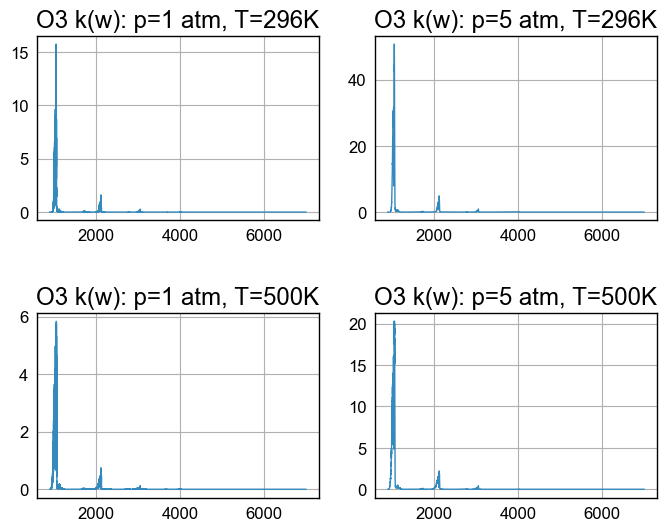

In [66]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
nu1,coef1 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':296.})
nu2,coef2 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':296.})
nu3,coef3 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':500.})
nu4,coef4 = absorptionCoefficient_Voigt(((3,1),),'O3',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':5,'T':500.})
plt.subplot(2,2,1); plt.plot(nu1,coef1); plt.title('O3 k(w): p=1 atm, T=296K')
plt.subplot(2,2,2); plt.plot(nu2,coef2); plt.title('O3 k(w): p=5 atm, T=296K')
plt.subplot(2,2,3); plt.plot(nu3,coef3); plt.title('O3 k(w): p=1 atm, T=500K')
plt.subplot(2,2,4); plt.plot(nu4,coef4); plt.title('O3 k(w): p=5 atm, T=500K')

## O2

In [52]:
10000000./900

11111.111111111111

In [53]:
fetch_by_ids('O2',[36,37,38],10000,20000)

BEGIN DOWNLOAD: O2
  65536 bytes written to data/O2.data
  65536 bytes written to data/O2.data
  65536 bytes written to data/O2.data
Header written to data/O2.header
END DOWNLOAD
                     Lines parsed: 1019
PROCESSED


In [54]:
nu7,coef7 = absorptionCoefficient_Lorentz(SourceTables='O2')

In [55]:
wl7=1e7/nu7

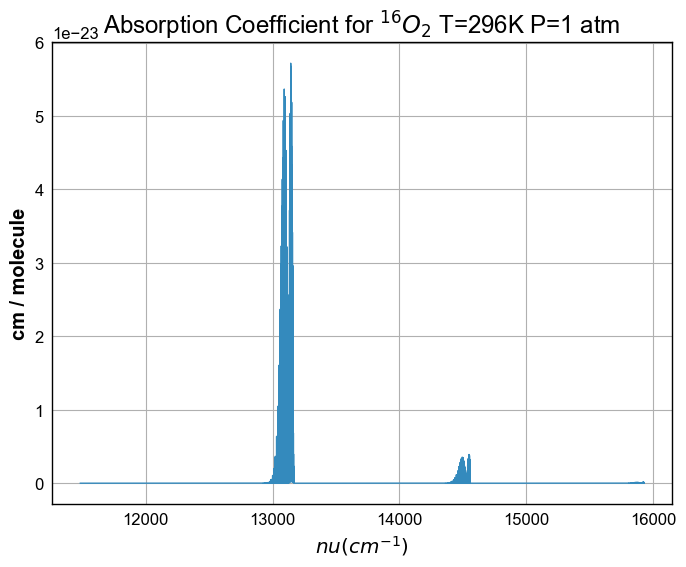

In [56]:
plt.plot(nu7,coef7)
plt.title('Absorption Coefficient for $^{16}O_2$ T=296K P=1 atm')
plt.xlabel('$nu (cm^{-1} )$')
plt.ylabel('cm / molecule')

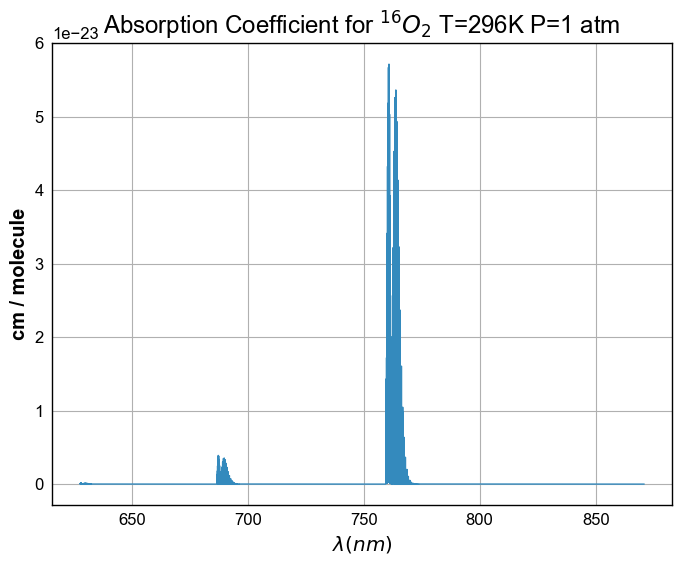

In [57]:
plt.plot(wl7,coef7)
plt.title('Absorption Coefficient for $^{16}O_2$ T=296K P=1 atm')
plt.xlabel('$ \lambda (nm) $')
plt.ylabel('cm / molecule')

In [ ]:
nu1,coef1 = absorptionCoefficient_Lorentz(((3,1),),'O2',
OmegaStep=0.01,HITRAN_units=False,GammaL='gamma_self',
Environment={'p':1,'T':296.})

# NO2

In [58]:
fetch('NO2',4,1,4000,50000)

BEGIN DOWNLOAD: NO2
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
  65536 bytes written to data/NO2.data
Header written to data/NO2.header
END DOWNLOAD
                     Lines parsed: 5873
PROCESSED


In [59]:
nu6,coef6 = absorptionCoefficient_Lorentz(SourceTables='NO2')

In [60]:
wl6=1e7/np.array(nu6)

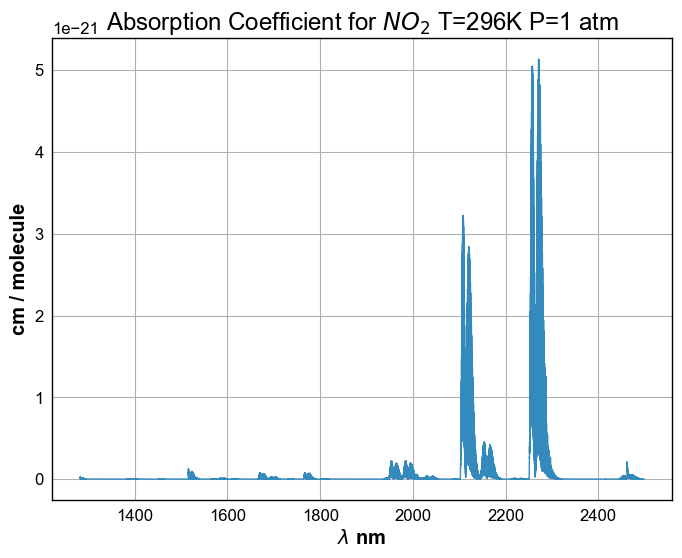

In [61]:
plt.plot(wl6,coef6)
plt.title('Absorption Coefficient for $NO_2$ T=296K P=1 atm')
plt.xlabel('$ \lambda$ nm ')
plt.ylabel('cm / molecule')